# Introduction 

## Présentation du contexte métier 

Avec l'essor des préoccupations alimentaires, tant en termes de santé que d'environnement, les consommateurs sont de plus en plus soucieux de connaître la provenance, la composition et l'impact de leurs achats alimentaires. Open Food Facts est une base de données collaborative sur les produits alimentaires du monde entier. Elle fournit des informations détaillées sur la composition nutritionnelle, les ingrédients, les allergènes, etc. Ces données sont essentielles pour de nombreuses parties prenantes :

Consommateurs : cherchant à prendre des décisions d'achat éclairées.
Entreprises : souhaitant améliorer leurs produits ou cibler des marchés spécifiques.
Chercheurs : analysant les tendances alimentaires et leurs impacts sur la santé publique.

## Objectif de l'analyse

1. Nettoyage des données : Étant une base de données collaborative, Open Food Facts peut contenir des erreurs, des doublons ou des informations manquantes. Notre premier objectif est de nettoyer et de préparer ces données pour une analyse approfondie.

2. Caractérisation des produits : Analyser la composition nutritionnelle des produits, identifier les produits les plus sains et ceux qui pourraient présenter des risques pour la santé.

3. Identification des tendances : Déceler des patterns ou des tendances parmi les produits, comme la prévalence d'ingrédients spécifiques ou les tendances nutritionnelles par pays ou par type de produit.

4. Compliance RGPD : Même si nous travaillons avec des données sur des produits et non sur des individus, il est essentiel de veiller à ce que notre traitement des données soit conforme aux normes et régulations en vigueur.

# 1 Exploration initiale des données 

In [52]:
pip install pycountry

Note: you may need to restart the kernel to use updated packages.


In [53]:
!pip install scikit-learn

## 1.1 Importation des bibliothèques nécessaires

In [2]:
import numpy as np
import pandas as pd # Pandas librairy to get data from any sources, csv or others file type
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from scipy import stats
import pycountry

## 1.2 Paramétrages des methodes de bibliothèques (si nécessaire)

- Aucun (pour l'instant)

## 1.3 Chargement des données 
Ici nous avons récupérer les données via le site d'Open Food Facts (https://static.openfoodfacts.org/) au format csv, que nous avons stocker dans le dossier associé "Resources"
Instanciation dans la variable "df" pour dataframe
___Attention le chargement des données est couteuse en ressources, assurez-vous d'avoir les ressources matérielles nécessaire pour exécuter la lecture de 8go de données (3 à 10 millions de lignes)___

In [3]:
df = pd.read_csv('./resources/fr.openfoodfacts.org.products.csv', sep='\t', error_bad_lines=False, warn_bad_lines=True, engine='python')

C:\Users\antoi\AppData\Local\Temp\ipykernel_4964\4023167406.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('./resources/fr.openfoodfacts.org.products.csv', sep='\t', error_bad_lines=False, warn_bad_lines=True, engine='python')
C:\Users\antoi\AppData\Local\Temp\ipykernel_4964\4023167406.py:1: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('./resources/fr.openfoodfacts.org.products.csv', sep='\t', error_bad_lines=False, warn_bad_lines=True, engine='python')
Skipping line 35984: '	' expected after '"'
Skipping line 153938: '	' expected after '"'
Skipping line 153939: '	' expected after '"'
Skipping line 153940: '	' expected after '"'
Skipping line 169607: '	' expected after '"'


## 1.4 Aperçu des premières lignes, types de données, statistiques descriptives

... premières lignes

In [4]:
df.shape

(320767, 162)

In [5]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


... types de données

In [6]:
df.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320767 entries, 0 to 320766
Data columns (total 162 columns):
 #    Column                                      Dtype  
---   ------                                      -----  
 0    code                                        object 
 1    url                                         object 
 2    creator                                     object 
 3    created_t                                   object 
 4    created_datetime                            object 
 5    last_modified_t                             object 
 6    last_modified_datetime                      object 
 7    product_name                                object 
 8    generic_name                                object 
 9    quantity                                    object 
 10   packaging                                   object 
 11   packaging_tags                              object 
 12   brands                                      object 
 13   brands_tags 

... statisitiques descriptives

In [14]:
df.describe()

,created_t,last_modified_t,cities,allergens_fr,serving_quantity,additives_n,additives,nutriscore_score,nova_group,ecoscore_score,...,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g,sulphate_100g,nitrate_100g
count,5.408300e+04,5.408300e+04,0.0,0.0,30237.000000,31518.000000,0.0,25250.000000,29588.000000,9739.000000,...,0.0,0.0,0.0,0.0,132.000000,0.0,0.0,0.0,1.000000,1.000000
mean,1.576348e+09,1.625623e+09,NaN,NaN,85.650241,2.821277,NaN,9.425069,3.500642,47.703768,...,NaN,NaN,NaN,NaN,0.000148,NaN,NaN,NaN,0.000031,0.000003
std,7.000869e+07,4.797288e+07,NaN,NaN,279.353107,3.538897,NaN,8.834973,0.948660,21.992349,...,NaN,NaN,NaN,NaN,0.000938,NaN,NaN,NaN,NaN,NaN
min,1.335538e+09,1.437408e+09,NaN,NaN,0.000000,0.000000,NaN,-14.000000,1.000000,-20.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000031,0.000003
25%,1.489094e+09,1.587597e+09,NaN,NaN,28.000000,0.000000,NaN,1.000000,3.000000,34.000000,...,NaN,NaN,NaN,NaN,0.000006,NaN,NaN,NaN,0.000031,0.000003
50%,1.587659e+09,1.625799e+09,NaN,NaN,41.000000,2.000000,NaN,11.000000,4.000000,43.000000,...,NaN,NaN,NaN,NaN,0.000017,NaN,NaN,NaN,0.000031,0.000003
75%,1.642061e+09,1.670820e+09,NaN,NaN,113.000000,4.000000,NaN,16.000000,4.000000,68.000000,...,NaN,NaN,NaN,NaN,0.000070,NaN,NaN,NaN,0.000031,0.000003
max,1.698604e+09,1.698632e+09,NaN,NaN,35371.000000,33.000000,NaN,39.000000,4.000000,125.000000,...,NaN,NaN,NaN,NaN,0.010738,NaN,NaN,NaN,0.000031,0.000003


In [15]:
df.info(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54083 entries, 0 to 54082
Data columns (total 203 columns):
 #    Column                                                 Dtype  
---   ------                                                 -----  
 0    code                                                   object 
 1    url                                                    object 
 2    creator                                                object 
 3    created_t                                              int64  
 4    created_datetime                                       object 
 5    last_modified_t                                        int64  
 6    last_modified_datetime                                 object 
 7    last_modified_by                                       object 
 8    product_name                                           object 
 9    abbreviated_product_name                               object 
 10   generic_name                                           o

## 1.5 Autre affichage , section de colonnes et découpage

Dans la fonction ci-après nous division notre dataset en par les sections définis dans la documentation

In [16]:
def extract_sections_from_description(file_path):
    sections = {}
    current_section = None

    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()

    for line in lines:
        if line.startswith("#"):
            current_section = line.replace("#", "").strip().replace(" ", "_").replace(":", "").replace(".", "").lower()
            sections[current_section] = []
        elif current_section and ":" in line:
            field_name = line.strip().split(" : ")[0].lower()
            sections[current_section].append(field_name)

    return sections

    print(sections)

# Extraire les sections et descriptions
desc_file_path = "./resources/data-fields.txt"
sections = extract_sections_from_description(desc_file_path)

# Associer les données aux descriptions et diviser par section
section_data = {}
for section, columns in sections.items():
    # Condition pour éviter les champs manquants de la section Misc. data
    # if section != "misc. data":
    # Utiliser une approche basée sur les sous-chaînes pour correspondre aux colonnes
    # valid_columns = [col for col in df.columns if any(field.lower() in col.lower() for field in columns)]
    # print(f"valid_columns :: {df.columns}")
    valid_columns = [col for col in df.columns if any(str(field) == str(col) for field in columns)]
    print(f"valid_columns :: {valid_columns}")
    # if valid_columns:
        # section_data[section] = df[valid_columns]

        # Création d'une variable pour chaque section
    section_var_name = section.strip().replace(" ", "_").replace(":", "").replace(".", "").lower()
    globals()[section_var_name] = df[valid_columns]
    print(f"Section en cours : {section_var_name}")
    # print(globals()[section_var_name].head())

# Affichage des sections et de leurs données
for section, df_section in section_data.items():
    print(f"\nSection: {section}")
    # print(df_section.head())

valid_columns :: ['code', 'url', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'product_name', 'generic_name', 'quantity']
Section en cours : general_information
valid_columns :: ['packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories', 'categories_tags', 'categories_fr', 'origins', 'origins_tags', 'manufacturing_places', 'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_fr', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities', 'cities_tags', 'purchase_places', 'stores', 'countries', 'countries_tags', 'countries_fr']
Section en cours : tags
valid_columns :: ['ingredients_text', 'traces', 'traces_tags']
Section en cours : ingredients
valid_columns :: ['serving_size', 'additives_n', 'additives', 'additives_tags', 'main_category', 'main_category_fr', 'image_url', 'image_small_url']
Section en cours : misc_data
valid_columns :: ['energy-kj_100g', 'energy-kcal_100g', 'energy_100g', 'fat_100g', 'saturated-fat_100g', 'butyric-acid_100g

Nous pouvons appeler chaque section dans la variable global en donnant en clef le nom de la section désirée

In [17]:
globals()["nutrition_facts"].head()

,energy-kj_100g,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,...,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,165.0,690.0,2.0,2.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,1.4,0.90,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,57.0,238.0,0.2,0.10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.0,NaN
4,NaN,375.0,1569.0,7.0,3.08,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2 Nettoyage et filtrage des colonnes

## 2.1 Identification des colonnes avec des données manquantes

Identification des colonnes avec plus de 50% de données manquantes

In [18]:
missing_values = df.isnull().sum() / len(df) * 100

Affichage des colonnes avec plus de 50% de valeurs null

In [19]:
high_missing_values = missing_values[missing_values > 50]
print(f"Columns with more than 50% missing data :\n {high_missing_values}")

Columns with more than 50% missing data :
 abbreviated_product_name     99.998151
generic_name                 98.591054
quantity                     85.562931
packaging                    95.808295
packaging_tags               95.808295
                               ...    
beta-glucan_100g            100.000000
inositol_100g               100.000000
carnitine_100g              100.000000
sulphate_100g                99.998151
nitrate_100g                 99.998151
Length: 153, dtype: float64


## 2.2 Suppression des colonnes avec plus de 50% de valeurs null

In [31]:
columns_droped = high_missing_values.index;
df = df.loc[:, df.isnull().mean() < .5]

print(f"Columns deleted : \n{columns_droped}")
print(f"Df length after deletion : {df.shape}")

Columns deleted : 
Index(['abbreviated_product_name', 'generic_name', 'quantity', 'packaging',
       'packaging_tags', 'packaging_fr', 'packaging_text', 'origins',
       'origins_tags', 'origins_fr',
       ...
       'nutrition-score-uk_100g', 'glycemic-index_100g', 'water-hardness_100g',
       'choline_100g', 'phylloquinone_100g', 'beta-glucan_100g',
       'inositol_100g', 'carnitine_100g', 'sulphate_100g', 'nitrate_100g'],
      dtype='object', length=153)
Df length after deletion : (52560, 15)


In [32]:
df.head()

,code,product_name,brands,countries_fr,additives_n,nutriscore_grade,main_category_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
0,00000000000000225,jeunes pousses,endives,France,NaN,unknown,Jeunes pousses d'épinards pour salades,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000000207025004,Andrè,NaN,Allemagne,NaN,NaN,NaN,690.0,2.0,2.00,65.0,12.6,1.5,NaN,NaN
2,00000000000003429145,L.casei,NaN,Espagne,0.0,NaN,NaN,NaN,1.4,0.90,9.8,9.8,2.7,0.10,0.040
3,00000000000026772226,Skyr,Danone,France,NaN,a,Fromages à la crème,238.0,0.2,0.10,3.9,3.9,10.0,0.09,0.036
4,0000000000017,Vitória crackers,NaN,France,NaN,unknown,NaN,1569.0,7.0,3.08,70.1,15.0,7.8,1.40,0.560


## 2.3 Évaluation de la pertinence des colonnes restantes

Dans cette partie nous allons décider quelles colonnes il est pertinent de garder pour notre analyse. Nous le faisons manuellement nous pourrions utiliser un modèle comme ChatGPT qui nous renverrais un taux de pertinence en fonction du sujet abordé.

In [22]:
df.columns.tolist()

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'last_modified_by',
 'product_name',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_fr',
 'countries',
 'countries_tags',
 'countries_fr',
 'ingredients_text',
 'ingredients_tags',
 'ingredients_analysis_tags',
 'serving_size',
 'serving_quantity',
 'additives_n',
 'nutriscore_grade',
 'nova_group',
 'pnns_groups_1',
 'pnns_groups_2',
 'states',
 'states_tags',
 'states_fr',
 'ecoscore_grade',
 'nutrient_levels_tags',
 'completeness',
 'last_image_t',
 'last_image_datetime',
 'main_category',
 'main_category_fr',
 'image_url',
 'image_small_url',
 'energy-kcal_100g',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'fruits-vegetables-nuts-estimate-from-ingredients_100g']

'code', -- Code produit : peut être important pour d'éventuelle relations
 'url', -- Url du produit : Pas intéressant 
 'creator', -- qui a créer les données, pas i
 'created_t',-- DELETE 
 'created_datetime', - pi -- DELETE
 'last_modified_t', - pi -- DELETE
 'last_modified_datetime', - pi -- DELETE
 'last_modified_by', - pi -- DELETE
 'product_name', -IMPORTANT 
 'brands',
 'brands_tags',
 'categories', - pi 
 'categories_tags', - pi -- DELETE
 'categories_fr', - pi -- DELETE
 'countries',
 'countries_tags', - pi -- DELETE
 'countries_fr', - pi -- DELETE
 'ingredients_text', 
 'ingredients_tags',
 'ingredients_analysis_tags',
 'serving_size',
 'serving_quantity',
 'additives_n',
 'nutriscore_grade',
 'nova_group',
 'pnns_groups_1',
 'pnns_groups_2',
 'states', 
 'states_tags', -- DELETE
 'states_fr', -- DELETE
 'ecoscore_grade', 
 'nutrient_levels_tags',
 'completeness',
 'last_image_t', -- DELETE
 'last_image_datetime', -- DELETE
 'main_category', - pi -- DELETE
 'main_category_fr', -- DELETE
 'image_url', 
 'image_small_url',
 'energy-kcal_100g', -IMPORTANT 
 'energy_100g', -IMPORTANT 
 'fat_100g', -IMPORTANT 
 'saturated-fat_100g', -IMPORTANT 
 'carbohydrates_100g', -IMPORTANT 
 'sugars_100g', -IMPORTANT 
 'fiber_100g', -IMPORTANT 
 'proteins_100g', -IMPORTANT 
 'salt_100g', -IMPORTANT 
 'sodium_100g', -IMPORTANT 
 'fruits-vegetables-nuts-estimate-from-ingredients_100g'

Nettoyage doublons ou vide(Pas de nom, vide, etc..). Voir les imputations. 

Suppression des colonnes inutiles

'code', --TI -- Code produit : peut être important pour d'éventuelle relations
 'product_name', -IMPORTANT 
 'brands',--TI
 'countries_fr', - pi
 'additives_n',
 'nutriscore_grade', --TI
 'main_category_fr', -- DELETE --TI
 'energy-kcal_100g', -IMPORTANT 
 'energy_100g', -IMPORTANT 
 'fat_100g', -IMPORTANT 
 'saturated-fat_100g', -IMPORTANT 
 'carbohydrates_100g', -IMPORTANT 
 'sugars_100g', -IMPORTANT 
 'fiber_100g', -IMPORTANT 
 'proteins_100g', -IMPORTANT 
 'salt_100g', -IMPORTANT 
 'sodium_100g', -IMPORTANT 
 'fruits-vegetables-nuts-estimate-from-ingredients_100g'

In [23]:
columns_to_keep = ["code","product_name","brands","countries_fr","additives_n","nutriscore_grade","main_category_fr","energy_100g","fat_100g","saturated-fat_100g","carbohydrates_100g","sugars_100g","fiber_100g","proteins_100g","salt_100g","sodium_100g","fruits-vegetables-nuts-estimate-from-ingredients_100g"]

## 2.4 Suppression des colonnnes qui ne sont pas nécessaire pour l'analyse 

Dans cette partie nous allons supprimer de notre data frame les colonnes défini juste précédement comme "non pertinantes" pour notre analyse

In [25]:
df = df[columns_to_keep];

print(f"Final columns : \n{df.columns}")

Final columns : 
Index(['code', 'product_name', 'brands', 'countries_fr', 'additives_n',
       'nutriscore_grade', 'main_category_fr', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g',
       'fruits-vegetables-nuts-estimate-from-ingredients_100g'],
      dtype='object')


# 3 Nettoyage approfondi des données.

## 3.1 Gestion des valeurs manquantes et doublons dans les colonnes restantes

### 3.1.1 Suppression des lignes null pour les colonnes `product_name` et `code`

Car sans valeurs aucune valeurs ne peut y etre associé

In [27]:
print(f"Data frame infos before deleting null values: {df.shape}")

df = df.dropna(subset=['product_name', 'code'])

print(f"Data frame infos after delete null values: {df.shape}")

Data frame infos before deleting : (52560, 17)
Data frame infos after delete : (52560, 17)


### 3.1.2 Suppression des doublons basés sur `code`

Le code est l'identifiant unique d'un produit, un doublon de cette valeur indiquerais une erreur, une fausse observation (ici record)

In [28]:
print(f"Data frame infos before deleting duplicates of `code` : {df.shape}")

df = df.drop_duplicates(subset='code')

print(f"Data frame infos after delete duplicates of `code`: {df.shape}")

Data frame infos before deleting duplicates of `code` : (52560, 17)
Data frame infos after delete duplicates of `code`: (52560, 17)


## 3.2 Traitement des valeurs aberrantes

### 3.2.1 Traitement des valeurs NAN et abérrantes des colonnes "_100g"

In [29]:
# Getting finished by _100g columns....
numeric_cols = df.columns[df.columns.str.contains('_100g')]
for col in numeric_cols:
    ## Numeric conversion...
    df[col] = pd.to_numeric(df[col], errors='coerce')
    # Replacement of extreme value by NaN value 
    df[col] = df[col].apply(lambda x: np.nan if x <= 0 or x > 4000 else x)

In [30]:
df.head()

,code,product_name,brands,countries_fr,additives_n,nutriscore_grade,main_category_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g
0,00000000000000225,jeunes pousses,endives,France,NaN,unknown,Jeunes pousses d'épinards pour salades,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000000207025004,Andrè,NaN,Allemagne,NaN,NaN,NaN,690.0,2.0,2.00,65.0,12.6,3.0,1.5,NaN,NaN,NaN
2,00000000000003429145,L.casei,NaN,Espagne,0.0,NaN,NaN,NaN,1.4,0.90,9.8,9.8,NaN,2.7,0.10,0.040,NaN
3,00000000000026772226,Skyr,Danone,France,NaN,a,Fromages à la crème,238.0,0.2,0.10,3.9,3.9,NaN,10.0,0.09,0.036,NaN
4,0000000000017,Vitória crackers,NaN,France,NaN,unknown,NaN,1569.0,7.0,3.08,70.1,15.0,NaN,7.8,1.40,0.560,NaN


### 3.2.2 Détection et traitement des outliers

In [36]:
def handle_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    Inter = Q3 - Q1
    return column[~((column < (Q1 - 1.5 * Inter)) | (column > (Q3 + 1.5 * Inter)))]

# Apply for every number columns
for col in df.select_dtypes(include=['number']).columns:
    df[col] = handle_outliers(df[col])
    print(f"Traitment ... : {df[col]}")

Traitment ... : 0        NaN
1        NaN
2        0.0
3        NaN
4        NaN
        ... 
54078    1.0
54079    1.0
54080    1.0
54081    1.0
54082    NaN
Name: additives_n, Length: 52560, dtype: float64
Traitment ... : 0           NaN
1         690.0
2           NaN
3         238.0
4        1569.0
          ...  
54078     708.0
54079     699.0
54080     697.0
54081     678.0
54082       NaN
Name: energy_100g, Length: 52560, dtype: float64
Traitment ... : 0        NaN
1        2.0
2        1.4
3        0.2
4        7.0
        ... 
54078    NaN
54079    NaN
54080    NaN
54081    NaN
54082    NaN
Name: fat_100g, Length: 52560, dtype: float64
Traitment ... : 0         NaN
1        2.00
2        0.90
3        0.10
4        3.08
         ... 
54078     NaN
54079     NaN
54080     NaN
54081     NaN
54082     NaN
Name: saturated-fat_100g, Length: 52560, dtype: float64
Traitment ... : 0            NaN
1        65.0000
2         9.8000
3         3.9000
4        70.1000
          ...   
54

## 3.3 Normalisation et transformation des données

### 3.3.1 Normalisation des données numériques

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[df.select_dtypes(include=['number']).columns] = scaler.fit_transform(df.select_dtypes(include=['number']))

### 3.3.2 Normalisation des données textuelles

In [ ]:
normalize_text = lambda value: value if pd.isna(value) else value.strip().lower()

In [38]:
df[df.select_dtypes(include=['object']).columns] = df.select_dtypes(include=['object']).apply(lambda x: x.str.lower().str.strip())

## 3.4 Validation de la cohérence des données

### 3.4.1 Verification des valeurs numériques

In [40]:
energy_min, energy_max = 0, 900  # Basic range for 100g
assert df['energy_100g'].dropna().between(energy_min, energy_max).all(), "Out of order"

In [42]:
nutrient_cols = ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'salt_100g', 'sodium_100g']
for col in nutrient_cols:
    assert df[col].dropna().ge(0).all(), f"Valeurs négatives détectées dans {col}"

### 3.4.2 Validation de l'additif 

Verification si la valeur de 'additives_n' est réelle et logique

In [ ]:
assert df['additives_n'].dropna().ge(0).all(), "Valeurs négatives trouvées dans additives_n"

### 3.4.3 Cohérence des grade de nutriscore

Vérification si les valeurs sont cohérente (correspondent à A,B,C,D,E)

In [43]:
valid_grades = ['a', 'b', 'c', 'd', 'e']
assert df['nutriscore_grade'].dropna().str.lower().isin(valid_grades).all(), "Grades de nutriscore invalides détectés"

AssertionError: Grades de nutriscore invalides détectés

### 3.4.5 Vérification des valeurs anormales pour les estimations

Verification des estimation : fruit, legumes et noix

In [45]:
assert df['fruits-vegetables-nuts-estimate-from-ingredients_100g'].dropna().between(0, 100).all(), "Valeurs anormales dans l'estimation des fruits, légumes et noix"

KeyError: 'fruits-vegetables-nuts-estimate-from-ingredients_100g'

### 3.4.6 Verifification des nom du produit et de la marque

In [46]:
assert df['product_name'].apply(lambda x: isinstance(x, str)).all(), "Incohérences dans product_name"
assert df['brands'].apply(lambda x: isinstance(x, str)).all(), "Incohérences dans brands"

AssertionError: Incohérences dans brands

### 3.4.7 Verification des noms des pays

In [47]:
assert df['countries_fr'].apply(lambda x: isinstance(x, str)).all(), "Incohérences dans countries_fr"

AssertionError: Incohérences dans countries_fr

In [59]:
list_countries = [country.name.lower() for country in pycountry.countries]

def is_valid_country(country):
    if isinstance(country, str):
        return country.lower() in list_countries
    else:
        return False
    
df['countries_fr'] = df['countries_fr'].dropna()
valid_countries = df['countries_fr'].apply(is_valid_country)

assert valid_countries.all(), "Des pays non valides ont été détectés !"

AssertionError: Des pays non valides ont été détectés !

### 3.4.8 Validation des codes produits

In [60]:
assert df['code'].astype(str).str.len().eq(13).all(), "Codes produits de longueur incohérente"

AssertionError: Codes produits de longueur incohérente

# 5 Imputation des valeurs manquantes

## 5.1 Imputation par la médiane

In [ ]:
for col in df.select_dtypes(include=['number']).columns:
    df[col].fillna(df[col].median(), inplace=True)

## 5.2 Imputation par la moyenne

In [ ]:
for col in df.select_dtypes(include=['number']).columns:
    df[col].fillna(df[col].mean(), inplace=True)

## 5.3 Imputation par KNN

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df[df.select_dtypes(include=['number']).columns] = imputer.fit_transform(df.select_dtypes(include=['number']))

In [70]:
df.shape

(52560, 15)

# 6 Vérification post imputation

## 6.1 Re Vérification des statistiques descriptives

In [62]:
print(df.describe())

        additives_n   energy_100g      fat_100g  saturated-fat_100g  \
count  52560.000000  52560.000000  52560.000000        52560.000000   
mean       0.256993      0.329842      0.252078            0.312220   
std        0.239853      0.203982      0.213227            0.241216   
min        0.000000      0.000000      0.000000            0.000000   
25%        0.060000      0.141504      0.070584            0.103135   
50%        0.200000      0.334989      0.207600            0.276602   
75%        0.400000      0.466992      0.358435            0.512554   
max        1.000000      1.000000      1.000000            1.000000   

       carbohydrates_100g   sugars_100g  proteins_100g     salt_100g  \
count        52560.000000  52560.000000   52560.000000  52560.000000   
mean             0.263595      0.256090       0.326435      0.289222   
std              0.193669      0.243347       0.225351      0.213885   
min              0.000000      0.000000       0.000000      0.000000   


## 6.2 Vérification de la distribution des données imputées

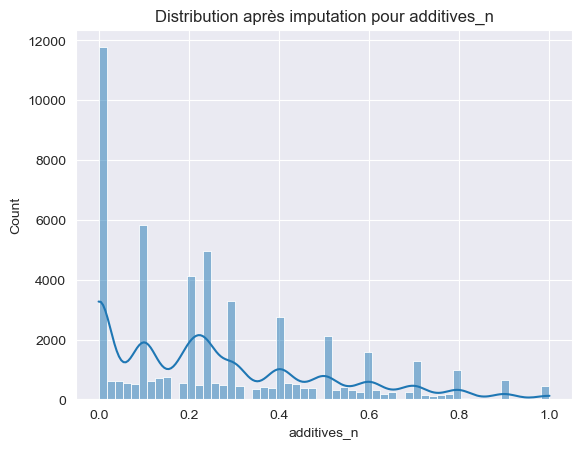

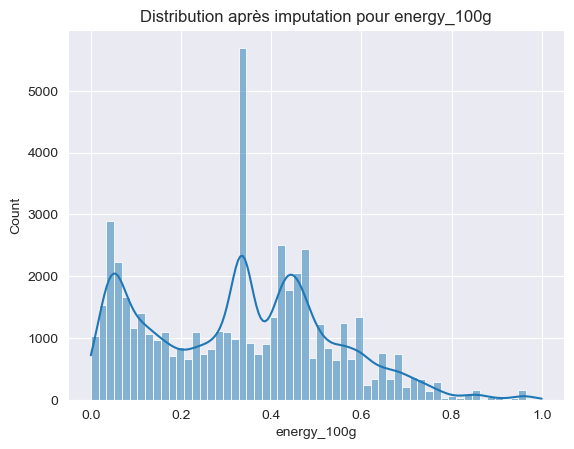

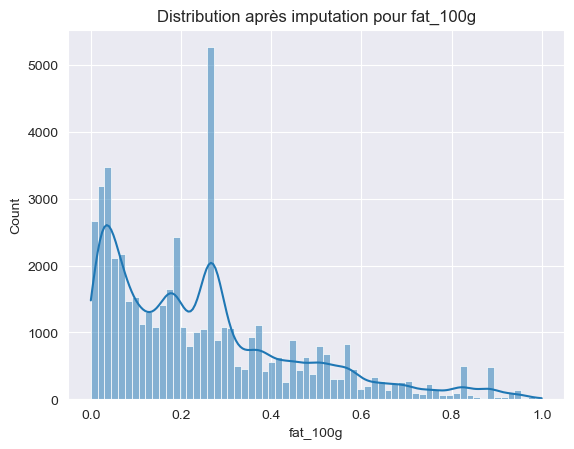

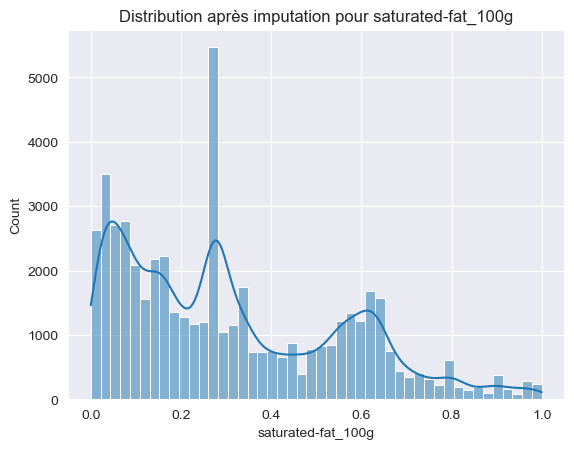

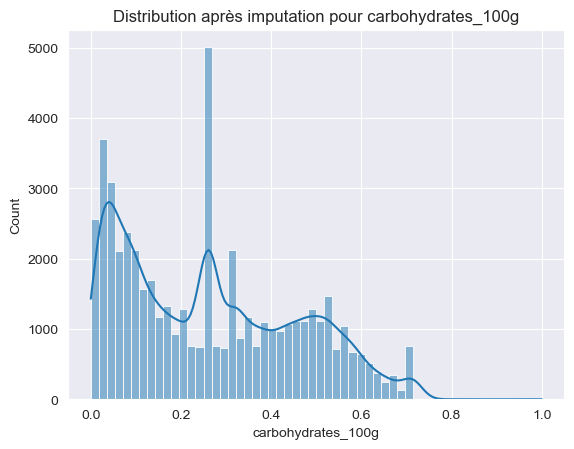

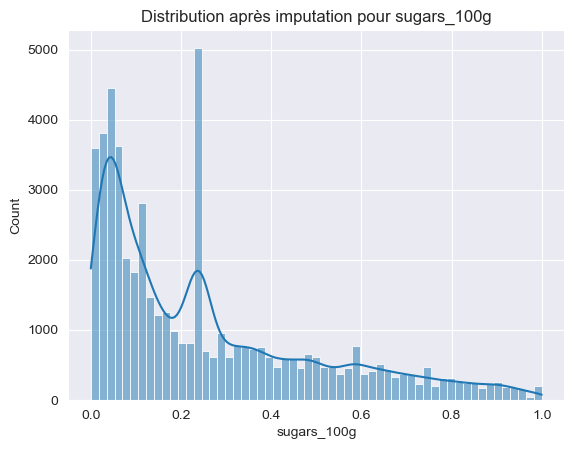

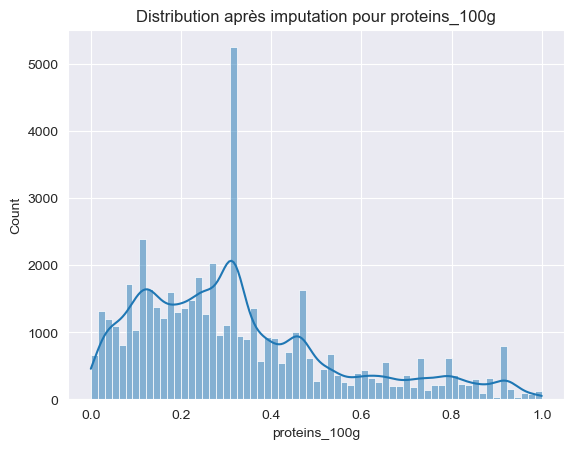

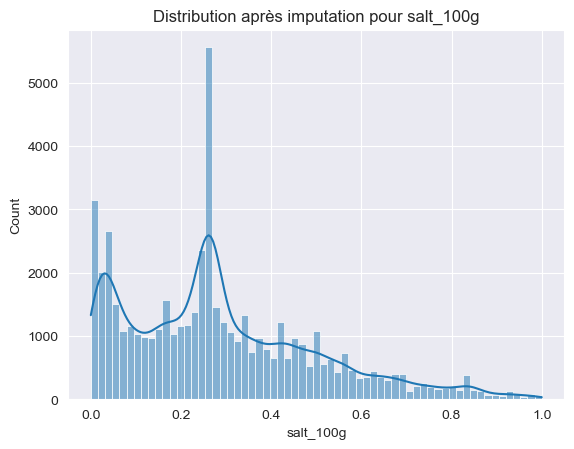

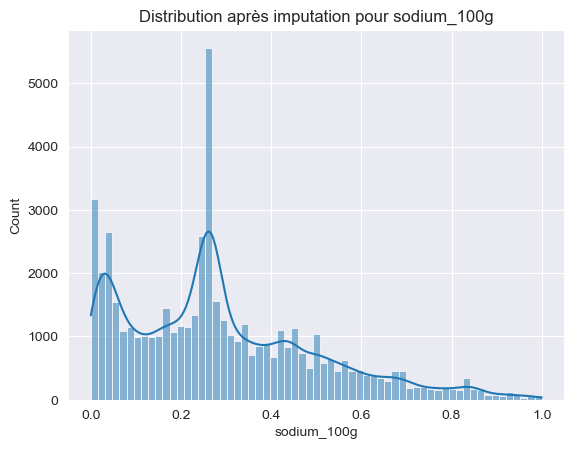

In [63]:
for col in df.select_dtypes(include=['number']).columns:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution après imputation pour {col}")
    plt.show()

# 7 Analyse exploratoire des données (AED)

## 7.1 Analyse Univariée

## 7.2 Analyse Bivariée / Multivariée

## 7.3 Analyse des tendances et des modèles

# 8 Visualisation des données

## 8.1 Visualisations des distributions et des relations

## 8.2 Visualisation avancées

# Exportation des données nettoyées

In [67]:
from datetime import datetime

now = datetime.now()
formatted_date = now.strftime("%Y%m%d_%H%M%S")

df.to_csv('./exports/cleaned_data'+formatted_date+'.csv', index=False)